In [1]:
import pandas as pd
import numpy as np

def descriptive_stats(data, column):
    stats = {
        'Mean': np.mean(data[column]),
        'Median': np.median(data[column]),
        'Mode': data[column].mode()[0],
        'Standard Deviation': np.std(data[column]),
        'Variance': np.var(data[column]),
        'Minimum': np.min(data[column]),
        'Maximum': np.max(data[column]),
        'Range': np.max(data[column]) - np.min(data[column])
    }
    return pd.Series(stats)


In [4]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')
sample_random = df.sample(n=150, random_state=42)
desc_random = descriptive_stats(sample_random, 'Delivery_Time_min')
print("Random Sample Descriptive Statistics:\n")
desc_random

Random Sample Descriptive Statistics:



,0
Mean,55.906667
Median,55.500000
Mode,57.000000
Standard Deviation,20.782476
Variance,431.911289
Minimum,14.000000
Maximum,122.000000
Range,108.000000


In [6]:
interval = len(df) // 150
sample_systematic = df.iloc[::interval, :]
desc_systematic = descriptive_stats(sample_systematic, 'Delivery_Time_min')
print("Systematic Sample Descriptive Statistics:\n")
desc_systematic

Systematic Sample Descriptive Statistics:



,0
Mean,54.898204
Median,53.000000
Mode,28.000000
Standard Deviation,21.460627
Variance,460.558500
Minimum,16.000000
Maximum,122.000000
Range,106.000000


In [21]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Delivery_Category,Cluster
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43,Fast,0
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84,Slow,1
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59,Medium,2
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37,Fast,0
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68,Slow,2


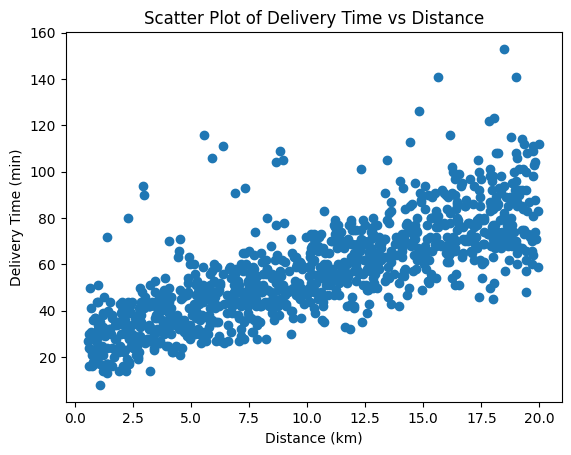

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.scatter(df['Distance_km'], df['Delivery_Time_min'])
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.title('Scatter Plot of Delivery Time vs Distance')
plt.show()

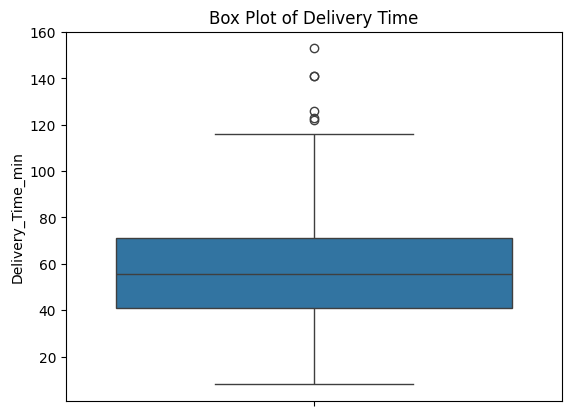

In [8]:
# Box Plot
sns.boxplot(y=df['Delivery_Time_min'])
plt.title('Box Plot of Delivery Time')
plt.show()

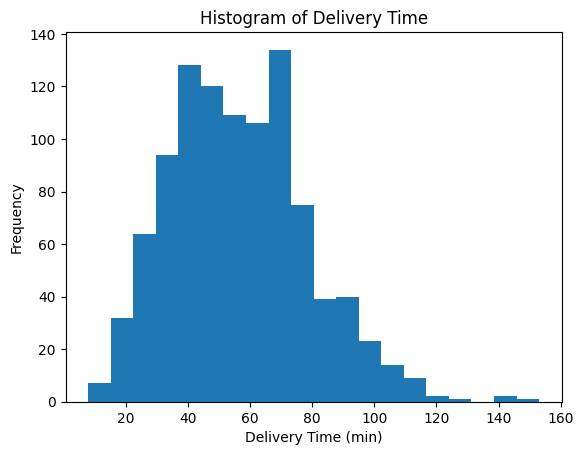

In [9]:

# Histogram
plt.hist(df['Delivery_Time_min'], bins=20)
plt.title('Histogram of Delivery Time')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Frequency')
plt.show()

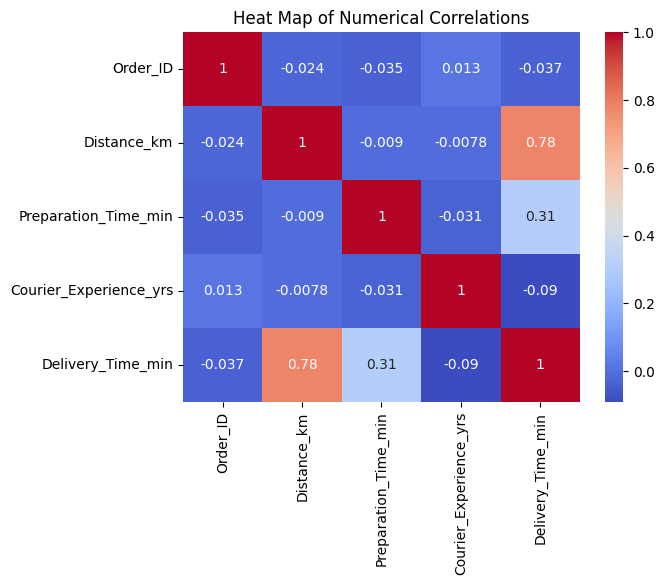

In [10]:
# Heat Map (Correlation)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Heat Map of Numerical Correlations')
plt.show()


/tmp/ipython-input-3116901994.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 0], data=delivery_data, x="Weather", y="Delivery_Time_min", palette="coolwarm")
/tmp/ipython-input-3116901994.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0, 1], data=delivery_data, x="Vehicle_Type", y="Delivery_Time_min", palette="viridis")
/tmp/ipython-input-3116901994.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=delivery_data, x="Time_of_Day", y="Delivery_Time_min", palette="Set2")
/tmp/ipython-input-31

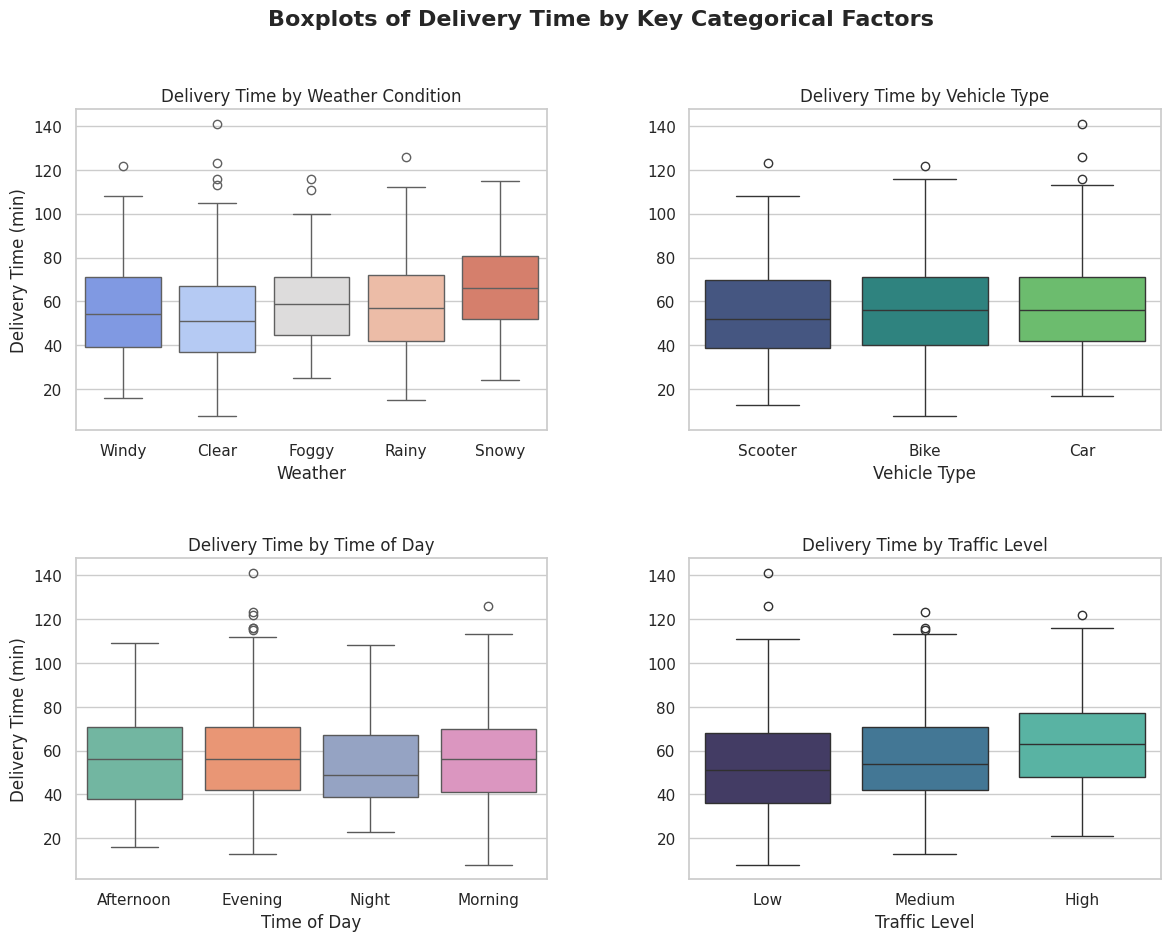

In [23]:
# Set visualization style
sns.set(style="whitegrid", palette="pastel")
delivery_data = df.copy()
# Create figure and axes for 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Boxplot 1: Delivery time by Weather
sns.boxplot(ax=axes[0, 0], data=delivery_data, x="Weather", y="Delivery_Time_min", palette="coolwarm")
axes[0, 0].set_title("Delivery Time by Weather Condition", fontsize=12)
axes[0, 0].set_xlabel("Weather")
axes[0, 0].set_ylabel("Delivery Time (min)")

# Boxplot 2: Delivery time by Vehicle Type
sns.boxplot(ax=axes[0, 1], data=delivery_data, x="Vehicle_Type", y="Delivery_Time_min", palette="viridis")
axes[0, 1].set_title("Delivery Time by Vehicle Type", fontsize=12)
axes[0, 1].set_xlabel("Vehicle Type")
axes[0, 1].set_ylabel("")

# Boxplot 3: Delivery time by Time of Day
sns.boxplot(ax=axes[1, 0], data=delivery_data, x="Time_of_Day", y="Delivery_Time_min", palette="Set2")
axes[1, 0].set_title("Delivery Time by Time of Day", fontsize=12)
axes[1, 0].set_xlabel("Time of Day")
axes[1, 0].set_ylabel("Delivery Time (min)")

# Boxplot 4: Delivery time by Traffic Level
sns.boxplot(ax=axes[1, 1], data=delivery_data, x="Traffic_Level", y="Delivery_Time_min", palette="mako")
axes[1, 1].set_title("Delivery Time by Traffic Level", fontsize=12)
axes[1, 1].set_xlabel("Traffic Level")
axes[1, 1].set_ylabel("")

# Main title for the figure
fig.suptitle("Boxplots of Delivery Time by Key Categorical Factors", fontsize=16, fontweight="bold")

# Show the combined plot
plt.show()

In [11]:
from scipy.stats import pearsonr, spearmanr, chi2_contingency

# Pearson & Spearman for numerical
pearson_corr, p_p = pearsonr(df['Distance_km'], df['Delivery_Time_min'])
spearman_corr, p_s = spearmanr(df['Distance_km'], df['Delivery_Time_min'])
print("Pearson correlation:", pearson_corr, "p-value:", p_p)
print("Spearman correlation:", spearman_corr, "p-value:", p_s)

# Chi-square for categorical
contingency = pd.crosstab(df['Weather'], pd.cut(df['Delivery_Time_min'], bins=3))
chi2, p, dof, ex = chi2_contingency(contingency)
print("Chi-square Test p-value:", p)


Pearson correlation: 0.7809983586157749 p-value: 2.976269388474936e-206
Spearman correlation: 0.81653535816881 p-value: 2.3195005133221196e-240
Chi-square Test p-value: 0.0005712011127941634


In [12]:
from scipy.stats import ttest_1samp

population_mean = df['Delivery_Time_min'].mean()
t_stat, p_val = ttest_1samp(sample_random['Delivery_Time_min'], population_mean)
print("t-statistic:", t_stat, "p-value:", p_val)


t-statistic: -0.4847582870199269 p-value: 0.6285596964875129


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = df.dropna()
X = df[['Distance_km']]
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.6292938200603325
MSE: 151.5150904482867


In [20]:
X = pd.get_dummies(df[['Distance_km','Weather','Traffic_Level','Time_of_Day',
                       'Vehicle_Type','Preparation_Time_min','Courier_Experience_yrs']],
                   drop_first=True)
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred = mlr.predict(X_test)

print("Multiple Linear Regression R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

Multiple Linear Regression R²: 0.83253145823043
MSE: 68.44776976091607


In [17]:
# Categorize Delivery Time
df['Delivery_Category'] = pd.qcut(df['Delivery_Time_min'], q=3, labels=['Fast', 'Medium', 'Slow'])

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X = pd.get_dummies(df.drop(['Delivery_Time_min', 'Delivery_Category', 'Order_ID'], axis=1), drop_first=True)
y = LabelEncoder().fit_transform(df['Delivery_Category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = accuracy_score(y_test, preds)
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print(f"{name} Accuracy: {results[name]}")



Logistic Regression Confusion Matrix:
 [[60 18  0]
 [ 5 39 10]
 [ 2  4 39]]
Logistic Regression Accuracy: 0.7796610169491526

KNN Confusion Matrix:
 [[65 13  0]
 [ 8 36 10]
 [ 2  5 38]]
KNN Accuracy: 0.7853107344632768

Naive Bayes Confusion Matrix:
 [[58 19  1]
 [ 7 37 10]
 [ 2  7 36]]
Naive Bayes Accuracy: 0.7401129943502824

Decision Tree Confusion Matrix:
 [[55 22  1]
 [ 9 32 13]
 [ 1 13 31]]
Decision Tree Accuracy: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
final_predictions = best_model.predict(X_test)
print(f"Predicted categories using {best_model_name}:", final_predictions[:10])


Predicted categories using KNN: [0 0 0 2 1 2 2 1 2 1]


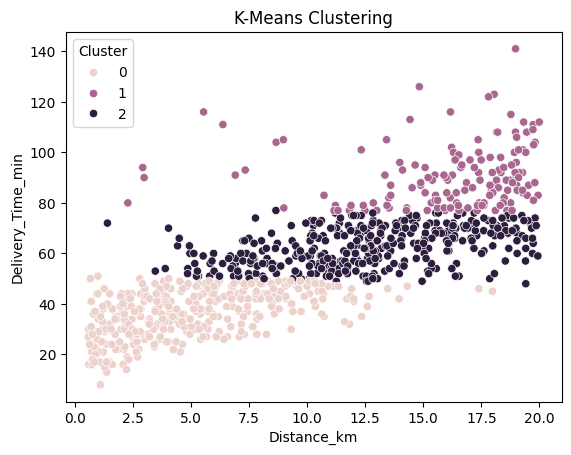

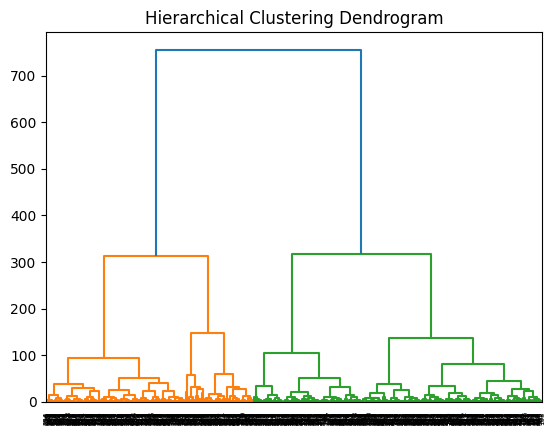

In [19]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Distance_km','Delivery_Time_min']])
sns.scatterplot(x='Distance_km', y='Delivery_Time_min', hue='Cluster', data=df)
plt.title('K-Means Clustering')
plt.show()

# Hierarchical (Dendrogram)
link = linkage(df[['Distance_km','Delivery_Time_min']], method='ward')
dendrogram(link)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()
